# <b>SPLASH! Computational Physics </b>
### Part 1: Curve Fitting

<div class="alert alert-block alert-success">
<b> Exercise 1: Importing packages</b>

Type and run (click the "play" button) the following lines: 

- import numpy as np 
- import scipy.optimize as opt
- import matplotlib.pyplot as plt 

These "packages" will be used throughout this tutorial.</div> 

In [27]:
#Type solution to Exercise 1 here

import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt

***
<b>Scenario:</b>  We want to measure the coefficient of static friction ($\mu_s$) of a cork-wood pairing. 

![spring scale.png](<attachment:spring scale.png>)

<div class="alert alert-block alert-info">

<b>Use the following equation to help you solve the upcoming exercises: </b> $$F_{pull,max} = \mu_s F_N$$

- $F_{pull,max}$ - the maximum force we can pull on the block with before it overcomes static friction and moves
- $F_N$ - the normal force, which is equal to mg, where m is the mass of weights+block and g is the gravitational acceleration

</div>

***

<div class="alert alert-block alert-success">
<b> Exercise 2: Defining a function in Python</b>

Define a linear function called model_lin with two arguments, x (independent variable) and m (slope), which returns m*x

In [28]:
#Type solution to Exercise 2 here

def model_lin(x,m):
    return m*x

<div class="alert alert-block alert-success">
<b> Exercise 3: Qualitative question</b> 

In our friction equation, what is the x, m, and model_lin(x,m)?

In [29]:
"""
Type solution to Exercise 3 here

x is F_N, m is mu_s, y is F_pull,max
"""


'\nType solution to Exercise 3 here\n\nx is F_N, m is mu_s, y is F_pull,max\n'

After measuring $F_{pull,max}$ with six different sets of weights, we acquire the following data in Newtons:

![spring constant table-2.png](<attachment:spring constant table-2.png>)

Error arises from lack of measurement precision.

<div class="alert alert-block alert-success">
<b> Exercise 4: </b> 

Make 3 arrays (arrays are lists that allow arithmetic operations). Name the normal force data "Fn," pulling force data "Fp," and error in the pulling force data "Fp_err." Normal force "Fn" is done as an example.

In [30]:
#Type solution to Exercise 4 here

Fn = np.array([0.40, 0.79, 1.19, 1.38, 1.58, 1.97])
Fp = np.array([0.17, 0.29, 0.40, 0.61, 0.62, 0.81])
Fp_err = np.array([0.01, 0.02, 0.01, 0.02, 0.04, 0.02])


<div class="alert alert-block alert-success">
<b> Exercise 5: Plotting a scatter plot</b> 

Google <b>plt.scatter</b> and click the first link that appears. Do you see this at the top of the page?

![Screen Shot 2025-03-29 at 3.05.47 PM.png](<attachment:Screen Shot 2025-03-29 at 3.05.47 PM.png>)

Use JUST the first two arguments of this function to plot $F_{N}$ vs. $F_{pull,max}$. Does it appear roughly linear?

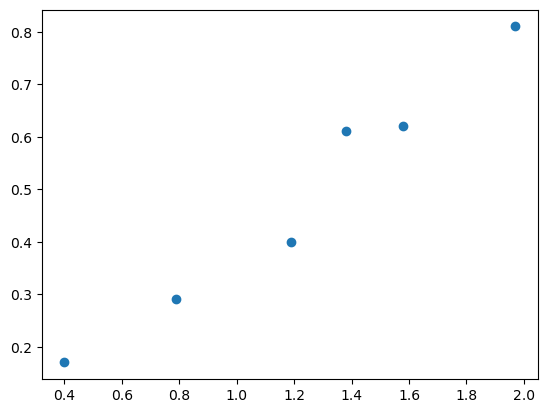

In [31]:
#Type solution to Exercise 5 here. Leave the plt.show() line as it is.

#WRITE HERE
plt.scatter(Fn, Fp)
plt.show()

Let's now plot the same thing with errorbars added to each of these data points.

<div class="alert alert-block alert-success">

<b>Exercise 6: Plotting a scatter plot with error bars</b> 

Google <b>plt.errorbar</b> and click the first link that appears. Use the first five arguments of the function, but <b>SKIP xerr</b>, and use fmt='o', to plot $F_{N}$ vs. $F_{pull,max}$. You should see the same plot as before, but with error bars added to each data point. </div>

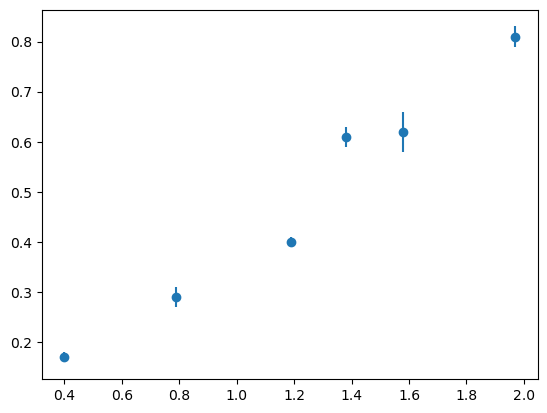

In [32]:
#Type solution to Exercise 6 here. Leave the plt.show() line as it is.

plt.errorbar(Fn, Fp, yerr=Fp_err, fmt='o')
plt.show()

***
Notice we can't just "connect the dots" of the experimental data to form a perfectly linear line. In order to find $\mu_s$, we need to find the line of best fit. We define what is "best" using the method of <b>Least Squares:</b> a statistical model that determines the slope for a line by minimizing the sum of the square of residuals ($r_i$) (if you want to learn more about this, check out [this wikipedia page](https://en.wikipedia.org/wiki/Least_squares)). In other words, we want to minimize R:

$$ R = \sum_{i=1}^{N} r_i^2 = \sum_{i=1}^{N} (y_i - (mx_i))^2$$

where
- $r_i$ is the residual, or the difference between theoretical and measured y values
- $y_i$ is the measured y value
- $mx_i$ is the theoretical y value
- N is the number of data points

![residuals.png](attachment:residuals.png)

<div class="alert alert-block alert-success">
<b> Exercise 7: Residual calculation</b> 

Calculate the residual at $F_{N}$ = 0.4 N if m = 0.5.

In [33]:
"""
Type solution to Exercise 7 here.

Fp(Fn=0.4N) - m*(0.4)
= 0.17 - 0.5*0.40 
= -0.03
"""

'\nType solution to Exercise 7 here.\n\nFp(Fn=0.4N) - m*(0.4)\n= 0.17 - 0.5*0.40 \n= -0.03\n'

<div class="alert alert-block alert-success">
<b> Exercise 8: Line of best fit?</b> 

Copy over your solution from exercise 6 here. Add the following line before plt.show(): plt.plot(Fn, model_lin(Fn, 0.5)). This plots a line y = 0.5x over the earlier scatter plot. Are the data points evenly distributed about the line? In other words, <b> is it a good fit?</b>


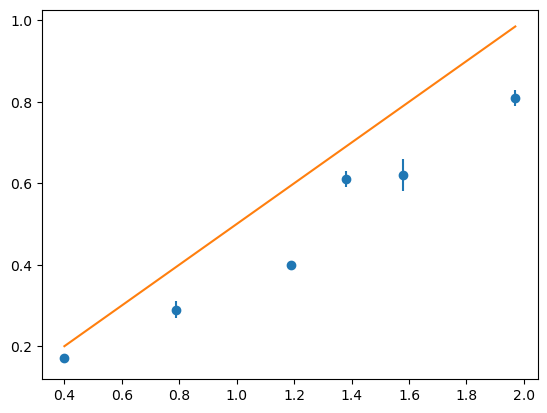

In [34]:
#Type solution to Exercise 8 here.

plt.errorbar(Fn, Fp, yerr=Fp_err, fmt='o')
plt.plot(Fn, model_lin(Fn, 0.5))
plt.show()

We could keep guessing a slope that will yield the best fit, but there is a way to do this using the package scipy.optimize.

<div class="alert alert-block alert-success">
<b> Exercise 9: Curve fitting</b> 

Google <b>opt.curve_fit</b> and click on the first link that appears. Do you see this at the top of the page?

![scipy.png](attachment:scipy.png)

Fill in the first five arguments below, but <b>SKIP p0</b>, using model_lin(x,m), Fn, Fp, and Fp_err.

In [35]:
#Type your solutions to Exercise 8 here. 

popt, pcov = opt.curve_fit(
    model_lin, Fn, Fp, sigma=Fp_err
)

<div class="alert alert-block alert-info">

<b>popt</b> - 1D array of best fit parameter(s). In our case, it is $\mu_s$

<b>pcov</b> - NxN array called covariance matrix. Its diagonal elements are square of standard deviation.

<div class="alert alert-block alert-success">
<b> Exercise 9: What is the best fit slope and its standard deviation?</b> 

Print m and stdv to see what they are.

In [36]:
#Type your solutions to Exercise 9 here. Leave existing code as they are.

m = popt
stdv = np.sqrt(np.diagonal(pcov))

#WRITE HERE
print(m)
print(stdv)

[0.38143186]
[0.01875795]


<div class="alert alert-block alert-success">
<b> Exercise 10: </b> 

Plot a line with our new best fit slope over your first scatter plot from exercise 6. How does the fit compare to the earlier guess of m=0.5?

Hint: replace 0.5 with m in your solution to exercise 8.

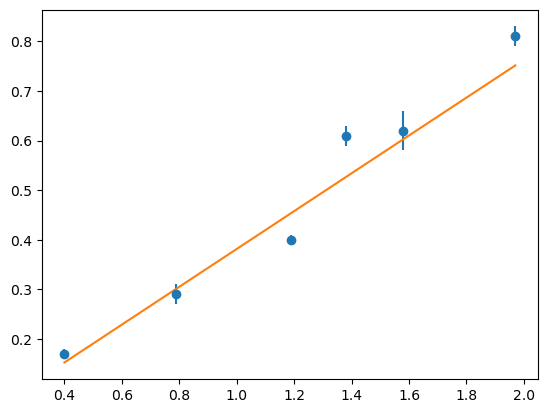

In [37]:
#Type solutions to Exercise 10 here

plt.errorbar(Fn, Fp, yerr=Fp_err, fmt='o')
plt.plot(Fn, model_lin(Fn, m))
plt.show()


<div class="alert alert-block alert-info">

### <b>Real world application</b> 

The method we used in this notebook to find the best fit slope can be extended to nonlinear equations with more than one unknown parameter. Examples in the real world include, but are not limited to:

1. <b>Oscillatory Systems:</b> Fitting damped or undamped sine waves to mechanical, electrical, or quantum oscillations.
2. <b>Electronics:</b> Extracting small-signal parameters of transistors by fitting I-V characteristics in the linear regime.
3. <b>Radioactive Decay:</b> Exponential fits to decay curves in nuclear physics experiments.